In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
#loading data
loan_data = pd.read_csv('logistic_regression.csv')

In [167]:
loan_data.T

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
grade,B,B,B,A,C,C,A,B,B,C,...,B,A,C,D,B,B,C,B,C,C
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2,B3,C5,...,B3,A1,C1,D4,B4,B4,C1,B1,C2,C2
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.,HR Specialist,Software Development Engineer,Office Depot,Application Architect,Regado Biosciences,...,Retirement Counselor,St Francis Medical Center,Data Center Specialist II,Operations Manager,Michael's Arts & Crafts,licensed bankere,Agent,City Carrier,"Gracon Services, Inc",Internal Revenue Service
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,...,10+ years,10+ years,1 year,10+ years,5 years,2 years,5 years,10+ years,10+ years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0


In [165]:
loan_data.T

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,...,10+ years,10+ years,1 year,10+ years,5 years,2 years,5 years,10+ years,10+ years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified,Verified,Source Verified,Not Verified,Verified,Verified,...,Not Verified,Not Verified,Source Verified,Not Verified,Not Verified,Source Verified,Source Verified,Verified,Verified,Verified
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,...,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
purpose,vacation,debt_consolidation,credit_card,credit_card,credit_card,debt_consolidation,home_improvement,credit_card,debt_consolidation,debt_consolidation,...,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation


In [3]:
loan_data.shape

(396030, 27)

- There are 396030 entries and 27 columns.

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
loan_data.isna().sum()/len(loan_data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

In [168]:
loan_data['state_code']=(loan_data['address'].str[-5:])
loan_data['Gap_earlier_Credit_line']=((pd.to_datetime(loan_data['issue_d']) - pd.to_datetime(loan_data['earliest_cr_line'])).dt.days)//30

loan_data.drop(columns=['title','emp_title','grade','sub_grade','issue_d','earliest_cr_line','address'],inplace=True)


In [ ]:
dic = {
    '10+ years':10,'4 years':4, '< 1 year':0,'6 years':6,'9 years':9,
    '2 years':2, '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1
}
loan_data.replace({'emp_length':dic},inplace=True)


In [16]:
loan_data.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


<AxesSubplot:>

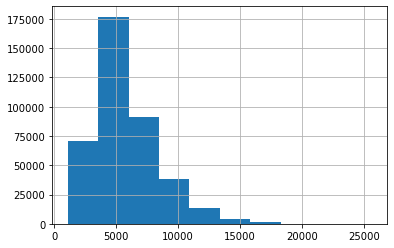

In [41]:
loan_data['Gap_earlier_Credit_line'].hist()

C:\Users\vemul\AppData\Local\Temp/ipykernel_10680/1470525430.py:1: RuntimeWarning: divide by zero encountered in log10
  sns.histplot(np.ma.filled(np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0))


<AxesSubplot:ylabel='Count'>

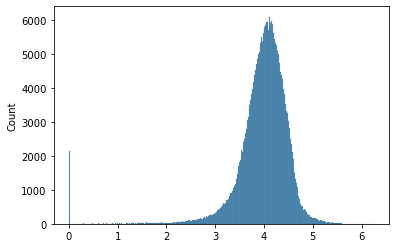

In [81]:
sns.histplot(np.ma.filled(np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0))

In [82]:
from scipy.stats import probplot

C:\Users\vemul\AppData\Local\Temp/ipykernel_10680/3060610491.py:1: RuntimeWarning: divide by zero encountered in log10
  probplot(np.ma.filled(np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0),plot=plt)


((array([-4.63903043, -4.45226747, -4.35107871, ...,  4.35107871,
          4.45226747,  4.63903043]),
  array([0.        , 0.        , 0.        , ..., 6.07556375, 6.1135366 ,
         6.24136366])),
 (0.47985583144064076, 3.9897920232573587, 0.8993697305858602))

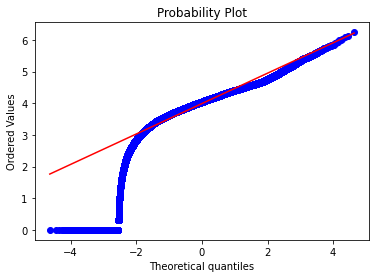

In [84]:
probplot(np.ma.filled(np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0),plot=plt)

In [37]:
((np.ma.filled((np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0))>3) and ((np.ma.filled(np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0))<6)).sum()

C:\Users\vemul\AppData\Local\Temp/ipykernel_9648/401231992.py:1: RuntimeWarning: divide by zero encountered in log10
  ((np.ma.filled((np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0))>3) and ((np.ma.filled(np.log10(np.ma.masked_equal(loan_data['revol_bal'], 0)), 0))<6)).sum()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

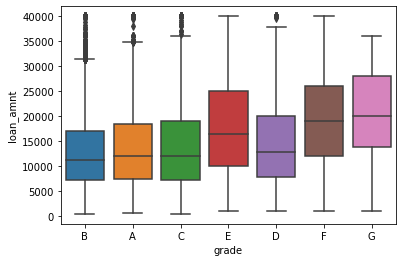

In [33]:
sns.boxplot(data=loan_data,x='grade',y='loan_amnt')

In [25]:
dic = {
    '10+ years':10,'4 years':4, '< 1 year':0,'6 years':6,'9 years':9,
    '2 years':2, '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1
}
loan_data.replace({'emp_length':dic},inplace=True)


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

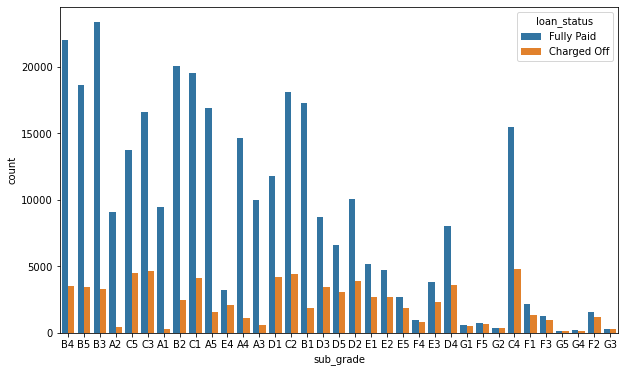

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data,x='sub_grade',hue='loan_status')

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

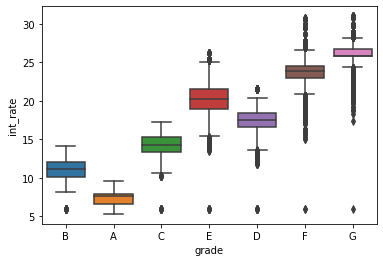

In [11]:
sns.boxplot(data=loan_data,x='grade',y='int_rate')

In [13]:
(loan_data[loan_data['grade']!='A']['int_rate']<7).sum()

68

<AxesSubplot:xlabel='grade', ylabel='installment'>

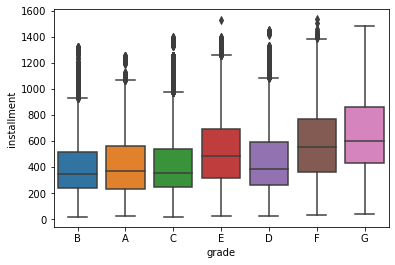

In [10]:
sns.boxplot(data=loan_data,x='grade',y='installment')

In [163]:
(loan_data['annual_inc']>150000).sum()

18331

(loan_data['dti']>40).sum()
(loan_data['revol_util']>100).sum()
(loan_data['open_acc']>25).sum()
(loan_data[loan_data['grade']!='A']['int_rate']<7).sum()
(loan_data['annual_inc']<140000).sum()
(loan_data['pub_rec']==0) and >0 ==1 ,pub_rec_bankruptcies



<AxesSubplot:>

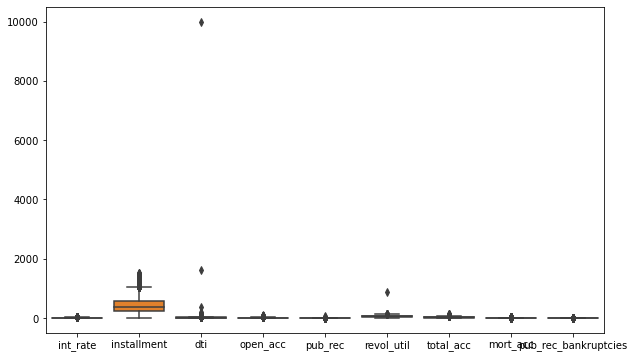

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data.drop(columns=['annual_inc','revol_bal','loan_amnt']))

In [146]:
loan_data['state_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: state_code, dtype: int64

In [156]:
(loan_data['open_acc']>25).sum()

6152

In [139]:
(loan_data['annual_inc']>150000).sum()

18331

{'whiskers': [<matplotlib.lines.Line2D at 0x2534d6363a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2534d636ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2534d62afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2534d2f1220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2534d2f15b0>],
 'means': []}

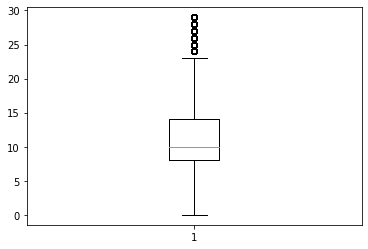

In [149]:
plt.boxplot(loan_data[loan_data['open_acc']<30]['open_acc'])

In [188]:
(loan_data['mort_acc']>7).sum()

6477

In [185]:
loan_data.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2530a2b95e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2530a2b9d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2530a2b9250>],
 'medians': [<matplotlib.lines.Line2D at 0x2530a2c2460>],
 'fliers': [<matplotlib.lines.Line2D at 0x2530a2c27f0>],
 'means': []}

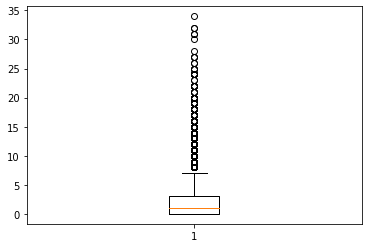

In [186]:
plt.boxplot(loan_data['mort_acc'])

In [115]:
(loan_data['total_acc']>50).sum()

13786

<AxesSubplot:>

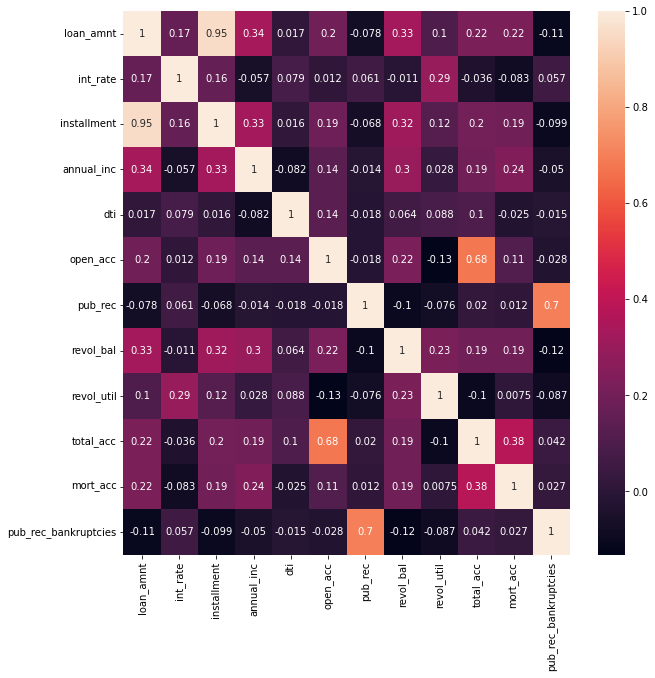

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(data=loan_data.corr(),annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2530a309250>,
 'caps': [<matplotlib.lines.Line2D at 0x2530a309970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2530a304e80>],
 'medians': [<matplotlib.lines.Line2D at 0x2530a3130d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2530a313460>],
 'means': []}

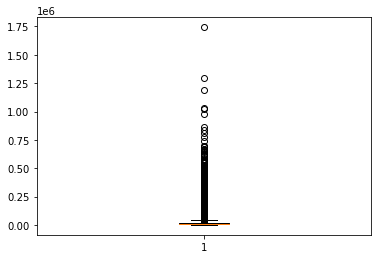

In [192]:
plt.boxplot(loan_data['revol_bal'])

In [190]:
(loan_data['Gap_earlier_Credit_line']>500).sum()

1415

In [191]:
loan_data['initial_list_status'].value_counts()

f    190432
w    150343
Name: initial_list_status, dtype: int64

In [195]:
loan_data.T

,0,1,2,3,4,5,6,7,8,9,...,396018,396019,396020,396022,396023,396024,396025,396026,396027,396028
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,15000.0,15000.0,10000.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.67,12.49,9.76,12.29,18.92,13.11,10.99,12.29,9.99,15.31
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,481.69,501.74,321.55,400.24,805.55,202.49,217.38,700.42,161.32,503.02
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,...,10+ years,10+ years,10+ years,1 year,10+ years,5 years,2 years,5 years,10+ years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,MORTGAGE,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,118450.0,50000.0,40000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified,Verified,Source Verified,Not Verified,Verified,Verified,...,Source Verified,Source Verified,Not Verified,Source Verified,Not Verified,Not Verified,Source Verified,Source Verified,Verified,Verified
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,...,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
purpose,vacation,debt_consolidation,credit_card,credit_card,credit_card,debt_consolidation,home_improvement,credit_card,debt_consolidation,debt_consolidation,...,credit_card,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation


In [194]:
loan_data.drop_duplicates()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state_code,Gap_earlier_Credit_line
0,10000.0,36 months,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690,299
1,8000.0,36 months,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113,127
2,15600.0,36 months,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113,90
3,7200.0,36 months,6.49,220.65,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813,99
4,24375.0,60 months,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,5 years,RENT,64000.0,Not Verified,Fully Paid,debt_consolidation,...,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,05113,259
396025,10000.0,60 months,10.99,217.38,2 years,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,30723,132
396026,21000.0,36 months,12.29,700.42,5 years,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,05113,109
396027,5000.0,36 months,9.99,161.32,10+ years,RENT,56500.0,Verified,Fully Paid,debt_consolidation,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,70466,201


In [197]:
loan_data['loan_status']=loan_data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [199]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
loan_data_city=tenc.fit_transform(loan_data[['purpose','state_code']],loan_data['loan_status'])

loan_data_new = loan_data_city.join(loan_data.drop(['purpose','state_code'],axis = 1))

In [200]:
loan_data_new

,purpose,state_code,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,Gap_earlier_Credit_line
0,0.810197,0.804980,10000.0,36 months,11.44,329.48,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,299
1,0.791862,1.000000,8000.0,36 months,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,127
2,0.833580,1.000000,15600.0,36 months,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,90
3,0.833580,1.000000,7200.0,36 months,6.49,220.65,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,99
4,0.833580,0.000000,24375.0,60 months,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,0.791862,1.000000,6000.0,36 months,13.11,202.49,5 years,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,259
396025,0.791862,0.803998,10000.0,60 months,10.99,217.38,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,132
396026,0.791862,1.000000,21000.0,36 months,12.29,700.42,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,109
396027,0.791862,0.803142,5000.0,36 months,9.99,161.32,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,201


<AxesSubplot:>

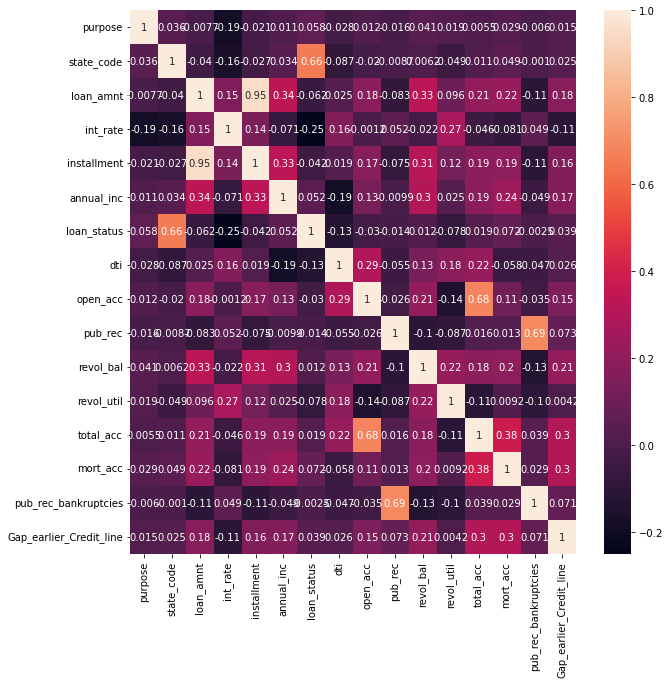

In [202]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data_new.corr(),annot=True)